In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *



In [ ]:

lngSet = pd.read_pickle("tidySets.pkl")

In [5]:
df = lngSet
import re

def extractGrade(s):
    match = re.search(r'(\d{1,2})\D*$', s)
    return int(match.group(1)) if match else 0

# Test cases
#print(extract_last_two_numbers("MINT9"))  # Output: 9
#print(extract_last_two_numbers("Auth"))   # Output: 0

df["Grade"] = df['Grade'].apply(lambda x: extractGrade(x))
df["Grade"] = pd.to_numeric(df["Grade"])

df["Year_Diff"] = 2023 - df["Year"].dt.year


df2 = (
    df
    .loc[df['Year'].dt.year > 1959]
    .groupby(["Set Name", "Year", "Year_Diff"])
    .agg(
        Total_Pop=('Count', 'sum'),
        Gems=('Count', lambda x: x[df['Grade'] == 10].sum())
    )
    .reset_index()
)


TypeError: expected string or bytes-like object, got 'int'

In [23]:
df2 = (
    df
    .loc[df['Year'].dt.year > 1900]
    .groupby(["Set Name", "Year", "Year_Diff"])
    .agg(
        Total_Pop=('Count', 'sum'),
        Gems=('Count', lambda x: x[df['Grade'] == 10].sum())
    )
    .reset_index()
)

df2["Gem_MT_%"] = df2["Gems"]/ df2["Total_Pop"]
df2 = df2.loc[df2["Total_Pop"] > 500]

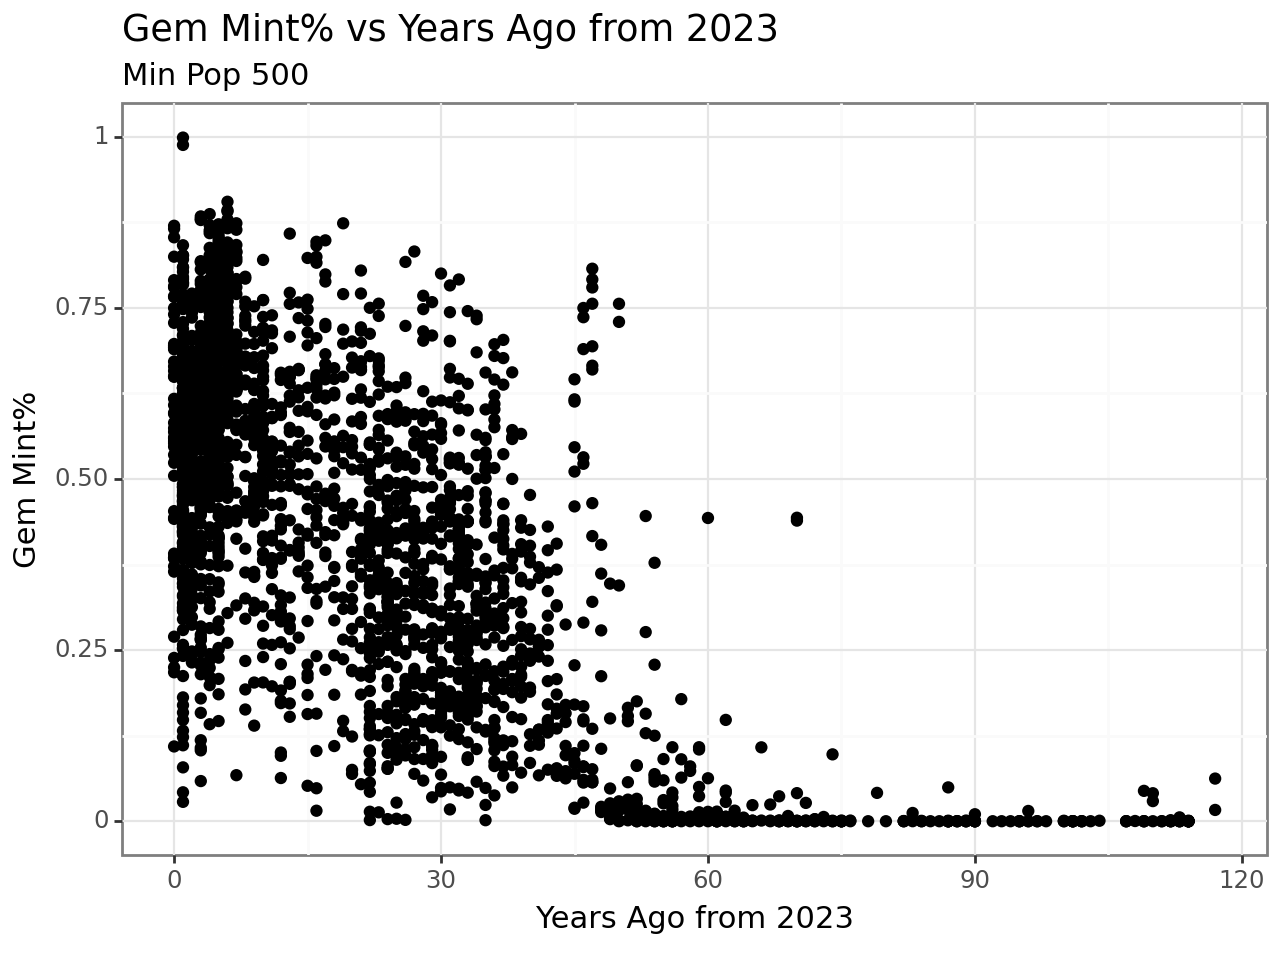

<Figure Size: (640 x 480)>

In [29]:
gemScatterPlot = (ggplot(df2,mapping = aes(x = "Year_Diff", y = "Gem_MT_%")) +
    geom_point() +
    labs(
        title = "Gem Mint% vs Years Ago from 2023",
        x = "Years Ago from 2023",
        y = "Gem Mint%",
        subtitle = "Min Pop 500"
    ) +
    theme_bw()
    
    
    )

gemScatterPlot

In [32]:
topSetPop2 = (
  lngSet
  .loc[lngSet['Year'].dt.year > 1999]
  .groupby(["Set Name", "Year"])
  .agg(
    Total_Pop = ("Count", "sum")
    
  )
  .reset_index()
  .sort_values(by="Total_Pop", ascending=False) 
  .head(10)
  
)

topSetPop2["Year"] = topSetPop2["Year"].dt.year
topSetPop2["Set Name"] = topSetPop2["Year"].astype(str) + " " + topSetPop2["Set Name"]

x = topSetPop2




SyntaxError: invalid syntax (34105430.py, line 30)

In [37]:

recentCards = (ggplot(x, mapping = aes(x = "Set Name", y = "Total_Pop")) +
            geom_col(fill = "lightblue", color = "blue", size = .5) +
            coord_flip() +
            scale_x_discrete(limits=topSetPop2.sort_values('Total_Pop', ascending=True)['Set Name']) +
            theme_bw()+
            labs(
                title = "Total Number of Cards Graded for the Top 10 Sets since 2000",
                x ="",
                y = "Number of Cards Graded"
            )
        

)

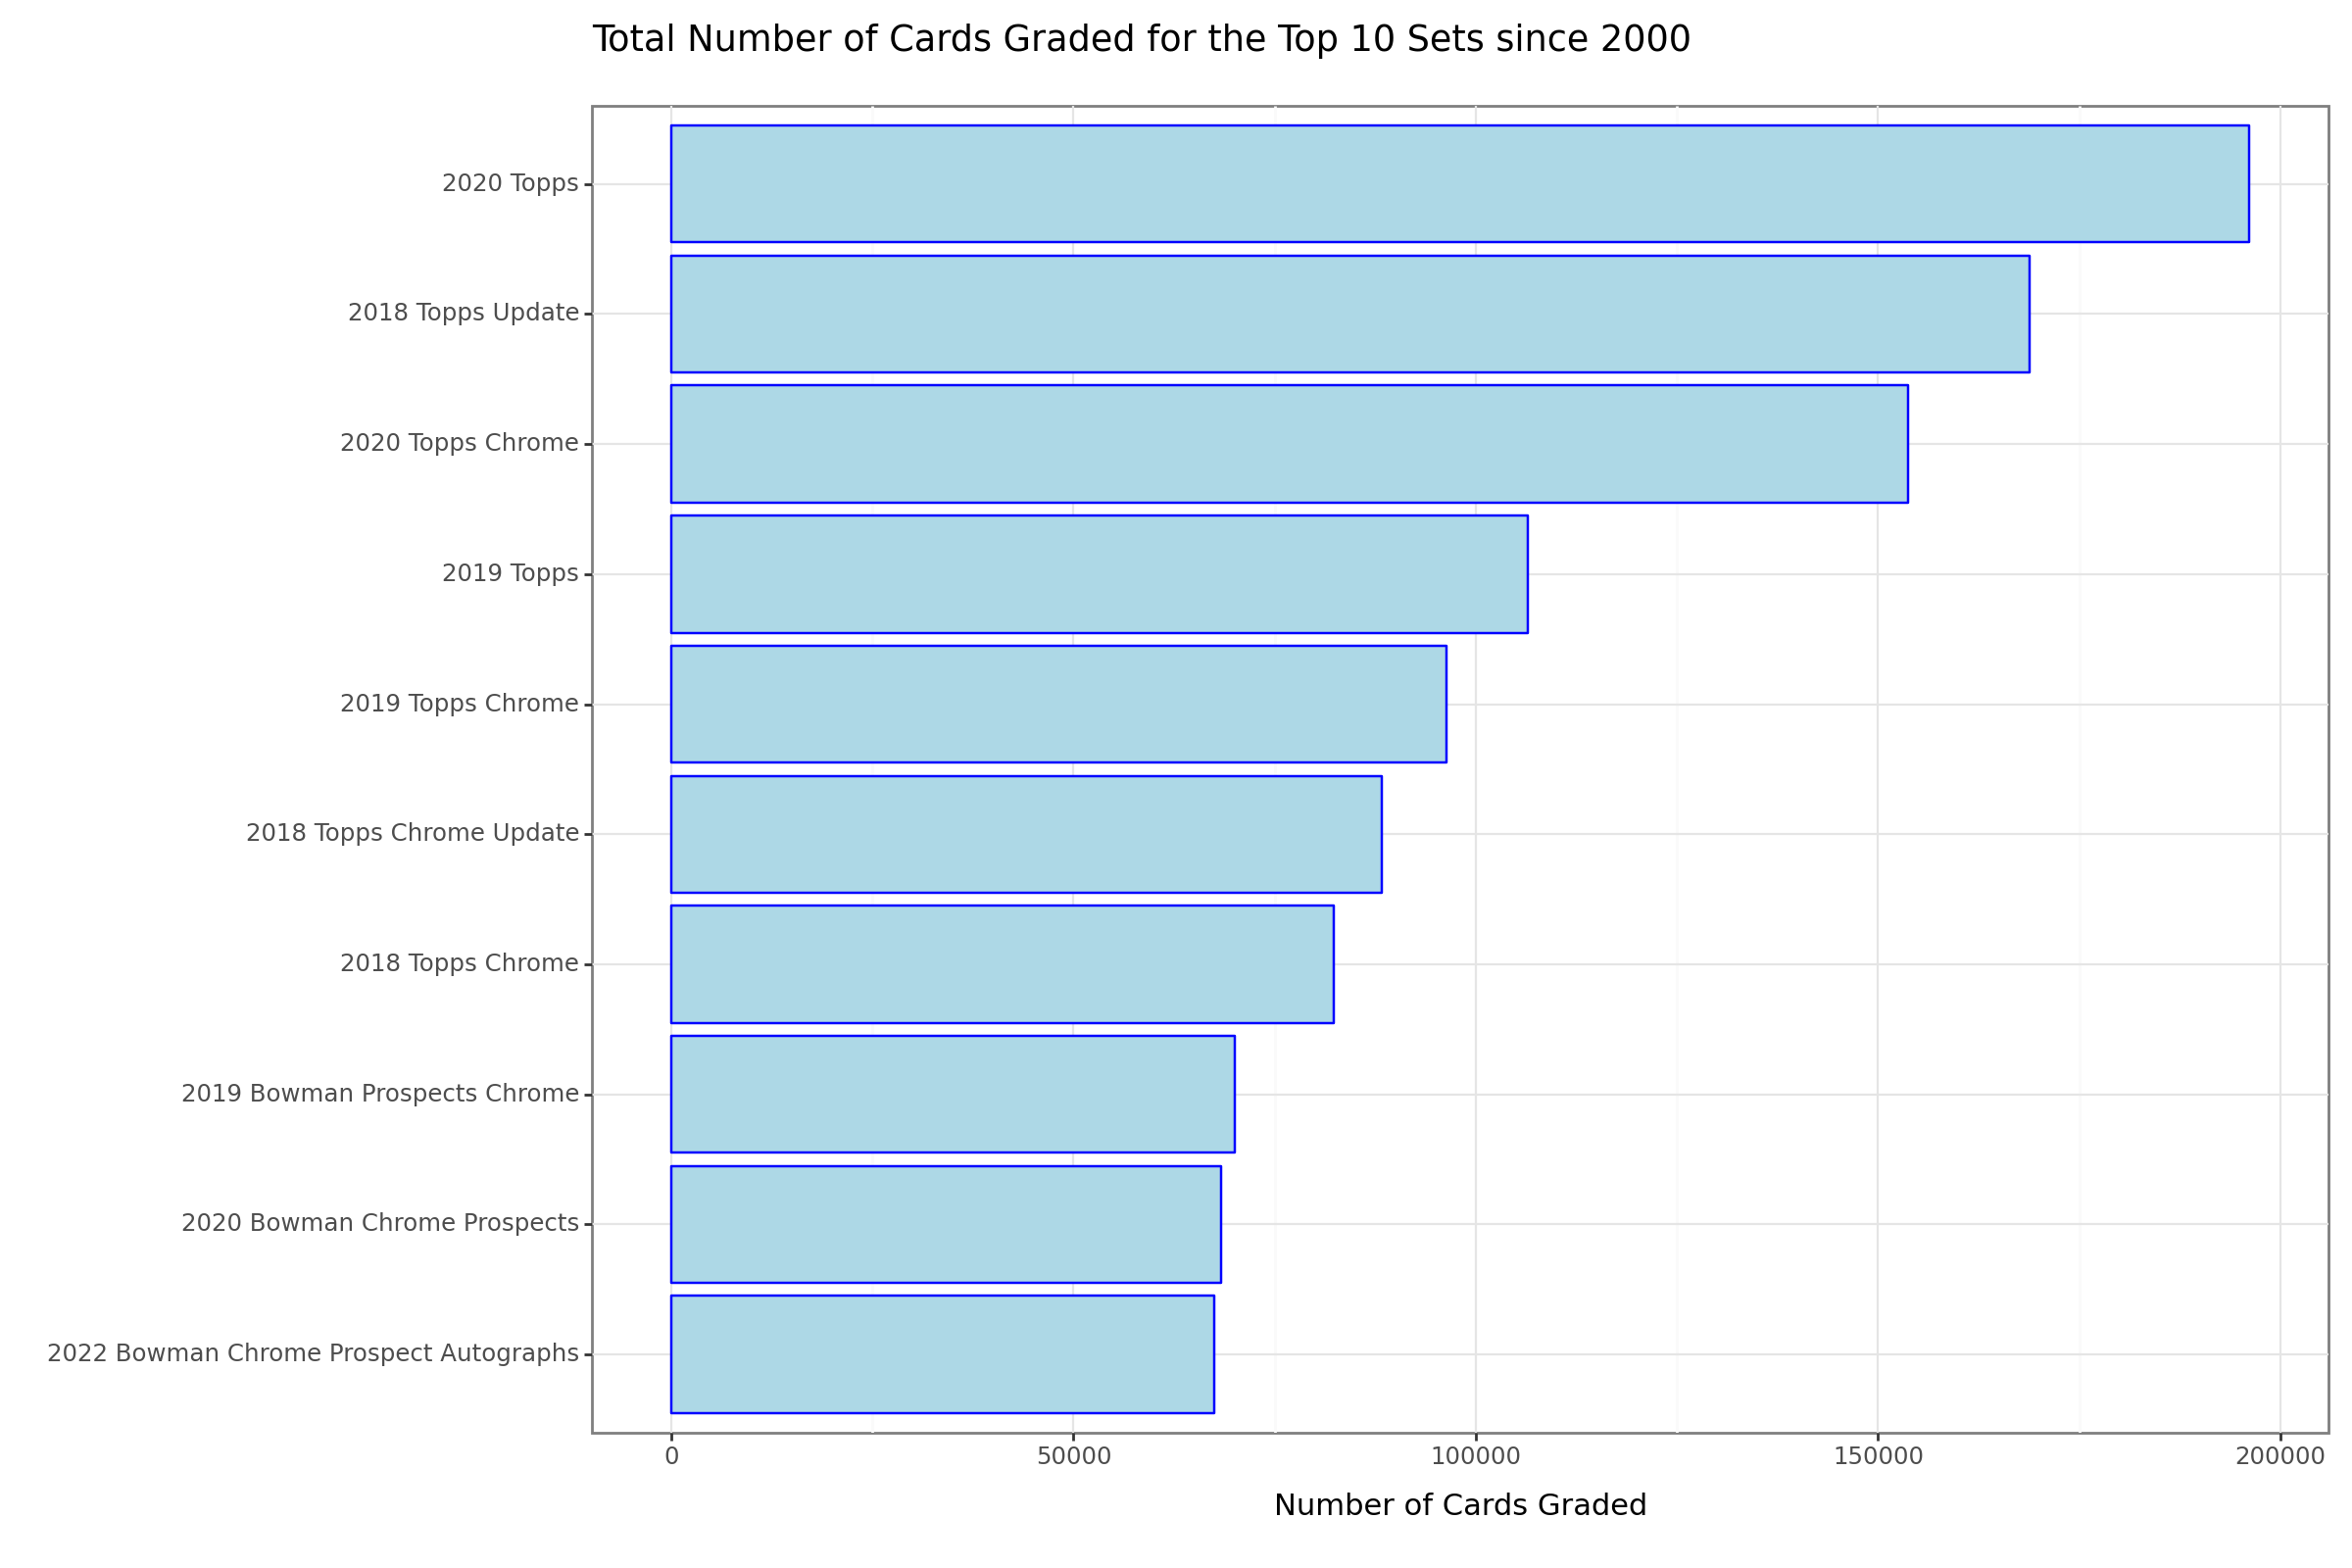

<Figure Size: (1200 x 800)>

In [38]:
recentCards + theme(figure_size=(12,8))

In [39]:
df3 = df2
df3["Year"] = df3["Year"].dt.year
df3["Set Name"] = df3["Year"].astype(str) + " " + df3["Set Name"]